##### Importing Library 

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt

#####  Load and PreProcess dataset

In [10]:
# Load the data into a DataFrame
df = pd.read_csv('C:\\Users\\User\\OneDrive\\Desktop\\CODE\\Projects\\EmailSpamDetector\\Task_1.csv')

# missing value -> "  "
df.fillna('', inplace=True)

# Convert spam -> 0 and ham -> 1
df['labels'] = df['labels'].astype(str)
df.loc[df['labels'].str.lower() == 'spam', 'labels'] = 0
df.loc[df['labels'].str.lower() == 'ham', 'labels'] = 1
df['labels'] = df['labels'].astype(int)


#####  Feature Extraction Using TF-IDF

In [11]:
# Features and labels
X = df['text']  # Features (text)
Y = df['labels']  # Labels (spam or ham)

# Split the data into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

# Initialize TfidfVectorizer for multiple languages
vectorizer = TfidfVectorizer(min_df=1, stop_words=['english', 'french', 'german'], lowercase=True)

# Transform text data into numerical features
X_train_features = vectorizer.fit_transform(X_train)
X_test_features = vectorizer.transform(X_test)


##### Train Logistic regression model


In [12]:
# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_features, Y_train)


LogisticRegression()

##### Model evaluation

In [13]:
# Evaluate on training data
train_predictions = model.predict(X_train_features)
train_accuracy = accuracy_score(Y_train, train_predictions)
print(f"Training Accuracy: {train_accuracy}")

# Evaluate on test data
test_predictions = model.predict(X_test_features)
test_accuracy = accuracy_score(Y_test, test_predictions)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.9825755309602153
Test Accuracy: 0.9805622009569378


##### Confusion Matrix


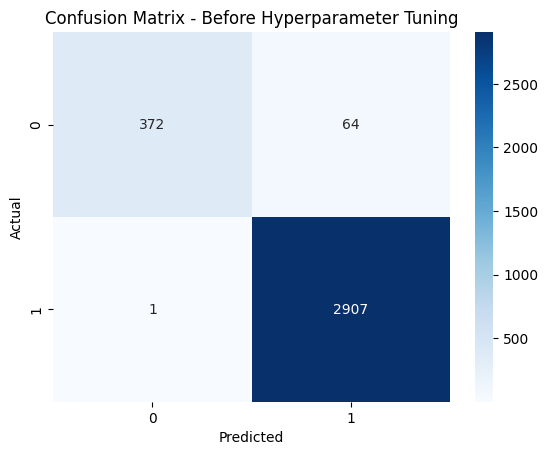

In [14]:
# Visualize the confusion matrix
conf_matrix = confusion_matrix(Y_test, test_predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Before Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


##### Hyperparameter Tuning with GridSearchCV

In [15]:
# Define the hyperparameters grid for tuning
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs']  # Solvers for optimization
}

# Use GridSearchCV for finding the best hyperparameters
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_features, Y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'solver': ['liblinear', 'lbfgs']},
             scoring='accuracy')

##### Evaluate Tuned Model

Best Hyperparameters: {'C': 100, 'solver': 'liblinear'}
Tuned Test Accuracy: 0.9949162679425837


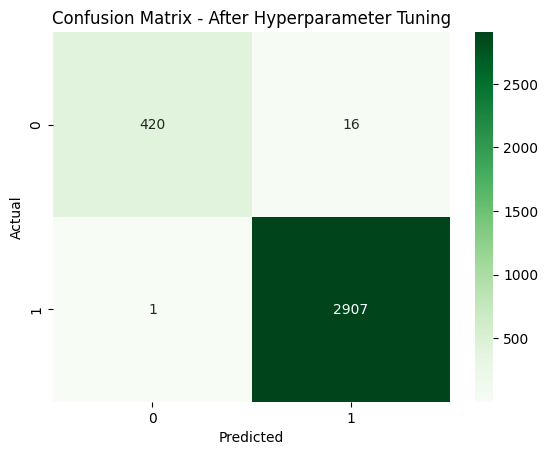

In [16]:
# Get the best parameters and re-evaluate the model
best_model = grid_search.best_estimator_
print(f"Best Hyperparameters: {grid_search.best_params_}")

# Evaluate the tuned model on the test set
tuned_test_predictions = best_model.predict(X_test_features)
tuned_test_accuracy = accuracy_score(Y_test, tuned_test_predictions)
print(f"Tuned Test Accuracy: {tuned_test_accuracy}")

# Confusion matrix after hyperparameter tuning
tuned_conf_matrix = confusion_matrix(Y_test, tuned_test_predictions)
sns.heatmap(tuned_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title("Confusion Matrix - After Hyperparameter Tuning")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()